<a href="https://colab.research.google.com/github/NarendraPati1/AI-ML/blob/main/Cards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import kagglehub
gpiosenka_cards_image_datasetclassification_path = kagglehub.dataset_download('gpiosenka/cards-image-datasetclassification')

print('Data source import complete.')

Data source import complete.


In [63]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Loading Dataset


In [64]:
class cardDataset(Dataset):
  def __init__(self , data_dir , transforms=None):
    self.data = ImageFolder(data_dir , transform=transforms)

  def __len__(self):
    return len(self.data)

  def __getitem__(self,idx):
    return  self.data[idx]

  def classes(self):
    return self.data.classes

In [65]:
dataset = cardDataset(
    data_dir = '/kaggle/input/cards-image-datasetclassification'
)

In [66]:
len(dataset)

8154

TypeError: Invalid shape (32, 3, 128, 128) for image data

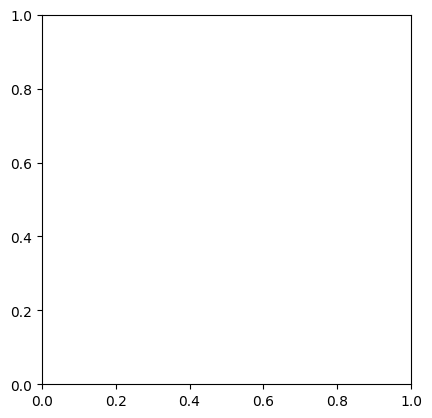

In [86]:
image , label = dataset[0]
label

In [68]:
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
])

data_dir = '/kaggle/input/cards-image-datasetclassification'
dataset = cardDataset(
    data_dir = data_dir ,
    transforms = transform
)

In [100]:
image , label = dataset[0]

Load and creating model

In [70]:
dataloader = DataLoader (dataset , batch_size = 32 , shuffle = True)

In [71]:
for images, labels in dataloader :
  break

In [72]:
labels

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1])

In [78]:
class classifier(nn.Module):
  def __init__(self , num_classes = 53):
    super(classifier , self).__init__()
    self.base_model = timm.create_model('resnet18' , pretrained = True)
    self.features = nn.Sequential(*list(self.base_model.children())[:-1])
    enet_out_size = 512
    self.classifier = nn.Linear(enet_out_size , num_classes)

  def forward(self , x):
    x = self.features(x)
    output = self.classifier(x)
    return output

In [79]:
model = classifier(53)

In [81]:
model(images).shape

torch.Size([32, 53])

Training


In [82]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr= 0.001)

In [98]:
from torch.utils.data import random_split, DataLoader

dataset_size = len(dataset)
train_size = int(0.8 * dataset_size)
test_size = dataset_size - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [99]:
for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")


Epoch [1/5] Loss: 0.0300, Accuracy: 99.11%
Epoch [2/5] Loss: 0.0202, Accuracy: 99.37%
Epoch [3/5] Loss: 0.0329, Accuracy: 98.99%
Epoch [4/5] Loss: 0.0427, Accuracy: 98.50%
Epoch [5/5] Loss: 0.0266, Accuracy: 99.10%


In [102]:
def evaluate(model, dataloader, device):
    model.eval()
    correct, total = 0, 0

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return 100 * correct / total

# After training:
test_acc = evaluate(model, test_loader, device)
print(f"Final Test Accuracy: {test_acc:.2f}%")


Final Test Accuracy: 96.57%


In [103]:
torch.save(model.state_dict(), "card_classifier.pth")
print("Model saved!")


Model saved!


In [104]:
model.load_state_dict(torch.load("card_classifier.pth"))
model.eval()

classifier(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop_block): Identity()
        (act1): ReLU(inplace=True)
        (aa): Identity()
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): ReLU(inplace=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding